### idea 
user input his(personality test answers)and the system recommeds his matching Cats 


### metodology 
since our users don't have any prior preferences towards Cats(USER COLD START problem) we have to start with this:

#### version 1 
1. Finding **nearset user**: the system takes user input (personality test answers) then finds the nearsest user (the most similar one) from our DataSet
    - for better pridections : we filterd out users with staisfacton level blow 0.8 

2. we get the nearest user - **Connceted Cat** (from the DataSet)

####  version 2 
same as vesrion 1 but builds on it 

- based on the **Connceted Cat** the system recommends the nearset cat from an external data set "Cat_dataset_online"
- Adv:cats and adopters datasets are indepentant 


some notes: 

- there isn't any active learning,the system just recommends based on the Dataset (aka. the scale where every user get his recommended cat)  
- due to the DataSet setup, each user is exposed to one and only one Cat (Aka. each user rates one Cat). so we are forced to use "**user_based** collaborative filtering", in Addition satisfaction here is based on live -interaction between the Adopter and the cat for some time, so the satisfaction is a reliable scale 




###  for relasing this we need 

- **urgent** evaluation of the recommender
- function for inserting the questionare results then append them to the Dataset 


##### done 
-  encapsulationg the version 2 into a proper function 
-  Cats random names feature 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', 1000)

In [4]:
df = pd.read_excel('https://github.com/TechLabs-Berlin/wt21-pet-match/blob/main/ds_documentation/data_set/data_cleaned/all_cleaned_num.xlsx?raw=true')

#df.describe()

In [5]:
df = df.set_index('id').drop(columns = 'breed')

In [6]:
df.head()

,cat_age,cat_gender,needs_outdoor,medical_conditions,behavioural_problems,cat_weight,likes_to_explore,playful,vocal,picked_up,timid,aggressive,adapts_quickly,prefers_alone,likes_stroke,tolerant_handled,friendly,fearful,adopter_gender,adopter_age,other_cats,outdoor_access,worries,easily_nervous,remains_calm,talkative,outgoing,reserved,new_ideas,values_artistic,active_imagination,rude,forgiving,considerate,thorough job,lazy,efficient,satisf_level
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6,1,2,2,1,3,4,4,3,2,3,1,3,2,4,3,4,5,2,2,2,2,5,4,4,4,4,4,2,5,3,1,4,5,4,4,4,1.00
1,2,2,2,1,1,3,4,4,1,4,3,3,2,3,4,3,5,2,2,2,0,2,5,5,5,4,3,5,4,3,4,3,5,5,5,1,5,1.00
2,5,1,1,1,1,4,5,3,4,2,2,3,4,3,3,2,3,3,2,1,0,1,5,0,0,4,0,2,3,0,4,0,4,0,5,0,0,0.85
3,4,2,2,1,1,4,3,4,3,5,4,2,2,2,5,4,4,4,2,1,1,2,5,5,2,4,3,4,4,5,5,4,5,4,3,4,3,1.00
4,3,2,2,1,1,5,4,3,5,2,3,1,4,3,4,3,4,3,2,2,3,2,4,4,4,2,3,4,3,3,3,3,4,4,4,4,4,1.00


## Random Cat-Names feature

- to for the easy identifaction of Cats 

In [7]:
# pip install names
import names

In [8]:
def Random_names(i):
    
    while i < len(df):
        if df["cat_gender"][df.index[i]] == 1:
            return str(names.get_first_name(gender='male'))
        else:
            return str(names.get_first_name(gender='female'))
        

In [9]:
temp_names = []
for n in df.index:
    random_name=Random_names(n)
    temp_names.append(random_name)
    
#print(temp_names)

df["cat_name"] = temp_names 


In [10]:
df

,cat_age,cat_gender,needs_outdoor,medical_conditions,behavioural_problems,cat_weight,likes_to_explore,playful,vocal,picked_up,timid,aggressive,adapts_quickly,prefers_alone,likes_stroke,tolerant_handled,friendly,fearful,adopter_gender,adopter_age,other_cats,outdoor_access,worries,easily_nervous,remains_calm,talkative,outgoing,reserved,new_ideas,values_artistic,active_imagination,rude,forgiving,considerate,thorough job,lazy,efficient,satisf_level,cat_name
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6,1,2,2,1,3,4,4,3,2,3,1,3,2,4,3,4,5,2,2,2,2,5,4,4,4,4,4,2,5,3,1,4,5,4,4,4,1.00,Russel
1,2,2,2,1,1,3,4,4,1,4,3,3,2,3,4,3,5,2,2,2,0,2,5,5,5,4,3,5,4,3,4,3,5,5,5,1,5,1.00,Frances
2,5,1,1,1,1,4,5,3,4,2,2,3,4,3,3,2,3,3,2,1,0,1,5,0,0,4,0,2,3,0,4,0,4,0,5,0,0,0.85,Tim
3,4,2,2,1,1,4,3,4,3,5,4,2,2,2,5,4,4,4,2,1,1,2,5,5,2,4,3,4,4,5,5,4,5,4,3,4,3,1.00,Barbara
4,3,2,2,1,1,5,4,3,5,2,3,1,4,3,4,3,4,3,2,2,3,2,4,4,4,2,3,4,3,3,3,3,4,4,4,4,4,1.00,Ellen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,12,2,1,1,1,3,5,5,3,4,4,1,4,2,5,4,5,2,2,5,2,1,2,1,4,4,4,2,3,4,3,1,5,5,4,1,4,1.00,Janice
3327,7,1,2,1,1,3,5,4,3,4,3,1,4,1,5,5,4,2,2,4,0,2,2,1,4,3,4,4,5,5,5,2,5,5,4,4,5,1.00,William
3328,4,1,1,1,1,3,5,5,5,5,1,1,5,2,5,5,5,1,2,1,3,1,5,5,3,3,2,4,5,5,5,4,5,5,3,5,4,1.00,Evan


## filtering out the unstisfied users 

- nearly 58% are fully staisfied (satisfaction = 1), while (~10%) are blew 0.8 satisfaction.
- since the recommender needs the users and Adopters to be high satisfied we choose to remove subjects with satisfaction less than 0.8 

<AxesSubplot:title={'center':'Satisfaction Distribution'}>

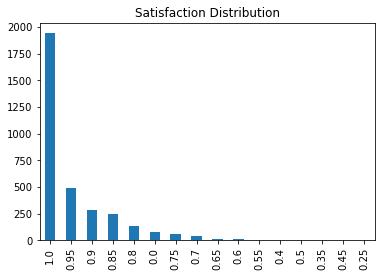

In [11]:
df['satisf_level'].value_counts().plot(kind='bar',title='Satisfaction Distribution' ,label= '.')


In [12]:
df['satisf_level'].value_counts(normalize = True)

1.00    0.582408
0.95    0.147403
0.90    0.085860
0.85    0.075053
0.80    0.039928
0.00    0.024917
0.75    0.018613
0.70    0.011408
0.65    0.003903
0.60    0.003603
0.55    0.002402
0.40    0.001501
0.50    0.001501
0.35    0.000600
0.45    0.000600
0.25    0.000300
Name: satisf_level, dtype: float64

In [13]:
df_happy = df.loc[df["satisf_level"] > 0.8].drop(columns=["satisf_level"]).reset_index(drop=True)
df_happy.shape

(2967, 38)

## Finding nearest user ( using correlation matrix )

In [14]:
# setting up a subset for the users_only features 
df_adopters = df_happy.loc[:, "adopter_gender":"efficient"]
df_adopters

,adopter_gender,adopter_age,other_cats,outdoor_access,worries,easily_nervous,remains_calm,talkative,outgoing,reserved,new_ideas,values_artistic,active_imagination,rude,forgiving,considerate,thorough job,lazy,efficient
0,2,2,2,2,5,4,4,4,4,4,2,5,3,1,4,5,4,4,4
1,2,2,0,2,5,5,5,4,3,5,4,3,4,3,5,5,5,1,5
2,2,1,0,1,5,0,0,4,0,2,3,0,4,0,4,0,5,0,0
3,2,1,1,2,5,5,2,4,3,4,4,5,5,4,5,4,3,4,3
4,2,2,3,2,4,4,4,2,3,4,3,3,3,3,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,2,5,2,1,2,1,4,4,4,2,3,4,3,1,5,5,4,1,4
2963,2,4,0,2,2,1,4,3,4,4,5,5,5,2,5,5,4,4,5
2964,2,1,3,1,5,5,3,3,2,4,5,5,5,4,5,5,3,5,4
2965,2,3,1,1,4,4,4,1,5,2,3,5,4,4,1,5,5,2,5


In [15]:
# create utility matrix table to study the user and book relation
df_pivot=df_adopters.transpose()
df_pivot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,...,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2531,2532,2533,2534,2535,2536,2537,2538,2539,2540,2541,2542,2543,2544,2545,2546,2547,2548,2549,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564,2565,2566,2567,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638,2639,2640,2641,2642,2643,2644,2645,2646,2647,2648,2649,2650,2651,2652,2653,2654,2655,2656,2657,2658,2659,2660,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700,2701,2702,2703,2704,2705,2706,2707,2708,2709,2710,2711,2712,2713,2714,2715,2716,2717,2718,2719,2720,2721,2722,2723,2724,2725,2726,2727,2728,2729,2730,2731,2732,2733,2734,2735,2736,2737,2738,2739,2740,2741,2742,2743,2744,2745,2746,2747,2748,2749,2750,2751,2752,2753,2754,2755,2756,2757,2758,2759,2760,2761,2762,2763,2764,2765,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783,2784,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794,2795,2796,2797,2798,2799,2800,2801,2802,2803,2804,2805,2806,2807,2808,2809,2810,2811,2812,2813,2814,2815,2816,2817,2818,2819,2820,2821,2822,2823,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833,2834,2835,2836,2837,2838,2839,2840,2841,2842,2843,2844,2845,2846,2847,2848,2849,2850,2851,2852,2853,2854,2855,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,2867,2868,2869,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879,2880,2881,2882,2883,2884,2885,2886,2887,

In [16]:
##to cheak no. of people who didnt fill at least half of the questionnare , only 75 persons so it is negegable 

df_pivot[df_pivot==0].apply(lambda x: x.count()>5).value_counts()

False    2892
True       75
dtype: int64

In [17]:
x=df_pivot.values.T  
x.shape

(2967, 19)

In [18]:
corr_mat = np.corrcoef(x)

###another methoud using Dataframe 
#df_matrix= df_pivot.corr(method='pearson')
#df_matrix

## Recommendation for Adopter (enter value)

In [26]:
user_input = 20

Adopter_names = df_pivot.columns
Cat_names = df_happy["cat_name"].tolist()
Adopter_list = list(Adopter_names)
Adopter_index = Adopter_list.index(user_input ) 
corr_Adopter = corr_mat[Adopter_index] 

## users are named with numbers for now 

### get their connceted cats 

this approch is not the best, as we recommend cats from our offline Data set ... it is better to get cats from separte Dataset (recommender_2 ) 

In [27]:
corr_Adopter = corr_mat[Adopter_index] 
corr_Adopter.shape

tuples = list(zip(Adopter_names,corr_Adopter,Cat_names))
tuples_df = pd.DataFrame(data =tuples, columns= ["ID_matching","correlation","cat_name"])
print("the nearest 10 adopters  to ",Adopter_index ," are")
tuples_df.sort_values(by = "correlation", ascending = False).iloc[0:10]


the nearest 10 adopters  to  20  are


,ID_matching,correlation,cat_name
20,20,1.000000,Rosetta
513,513,0.970695,Patsy
1444,1444,0.958436,Hilda
1646,1646,0.942318,Richard
2762,2762,0.926701,Rodney
798,798,0.923953,Alvin
438,438,0.920922,Priscilla
48,48,0.915050,Lessie
170,170,0.913472,Lorita
1002,1002,0.912423,Bessie


### Analyzing the correlation results 
- note:here the recommender predict user input(correlation =1) as best choice, that validate that the results can be reliable
- we decided to look into +ve correlaltion numbers and anyalize it 

       ID_matching  correlation
count  2775.000000  2775.000000
mean   1485.468468     0.515097
std     856.285202     0.199374
min       0.000000     0.002240
25%     742.500000     0.377169
50%    1487.000000     0.531306
75%    2230.500000     0.666612
max    2966.000000     1.000000


<AxesSubplot:title={'center':'correlation Distribution'}>

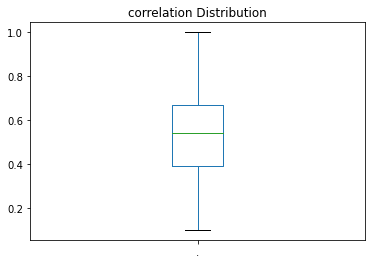

In [28]:
print(tuples_df.loc[tuples_df["correlation"]> 0].describe())

#analyzing the correlation numbers bigger than 1

tuples_df.loc[tuples_df["correlation"]> 0.1]["correlation"].plot(kind='box',title='correlation Distribution' ,label= '.')

<AxesSubplot:title={'center':'correlation Distribution'}>

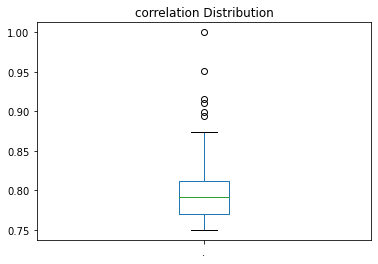

In [22]:
## with closer look into numbers around the 75% percentile   
tuples_df.loc[tuples_df["correlation"]> 0.75]["correlation"].plot(kind='box',title='correlation Distribution' ,label= '.')

- from here we can say that the outliers *above 0.9 correlation* are the ones who Can perform solid good prediction 

(this is exploratory analysis for further results cheak **Evalutation part** )

## Evaluation 
- for recommender evaluation, we used (accurency, recall , Covrage Tests)
- to evalute the preformance we thought of clastering the pridections into clasters (aka. changing the result into a binary system)as follows:
    - relevant recommendation = correlation above 0.9 
    - not relevant recommendation = else 
    
    
what column needed:
- reommendation clastering  .. to change it into Binary Classifier problem 


In [29]:
df_eval=tuples_df.sort_values(by = "correlation", ascending = False).iloc[1:11]
df_eval['Relevant_recommendation'] =df_eval.groupby(['ID_matching'])["correlation"].apply(lambda x: (x > 0.9).sum())#.replace({1: "good", 0: "bad"})
df_eval

,ID_matching,correlation,cat_name,Relevant_recommendation
513,513,0.970695,Patsy,1
1444,1444,0.958436,Hilda,1
1646,1646,0.942318,Richard,1
2762,2762,0.926701,Rodney,1
798,798,0.923953,Alvin,1
438,438,0.920922,Priscilla,1
48,48,0.915050,Lessie,1
170,170,0.913472,Lorita,1
1002,1002,0.912423,Bessie,1
997,997,0.909107,Sherri,1


In [106]:

acc = df_eval['Relevant_recommendation'].sum()/len(df_eval)*100
print ("accurency value for user",user_input,"is" ,acc )


accurency value for user 20 is 100.0


## caluating Coverage
Steps 
- a random list of IDs
- get 10 recommendation for each ID from this list (excluding the cat with the same ID as user)
- append it to a DataFrame
- count unique catID
- coverage = num_unique_catIDs / number of recommendations (10*num_users)
Maybe do three cycles and compare the coverage you get 

In [40]:
# setting a test Datset of Adopter
df_adopters_Test=df_adopters.sample(frac=0.1, replace=True, random_state=100).drop_duplicates()
# to cheak for duplictes using .sample
#print(len(df_adopters_Test.index.unique()))

Int64Index([1544, 2840, 1859,   79, 1930,  350, 1972, 1890,   53, 1602,
            ...
             909, 2721, 1368, 2711,  234, 1595, 2552, 1032, 1613,  303],
           dtype='int64', length=285)

In [57]:
### recommender for evalutation 
def recommend_cat_eval(name):
    name=int (name) ## reomve the int, case your input is string 
    Adopter_names = df_pivot.columns
    Adopter_list = list(Adopter_names)
    Cat_names = df_happy["cat_name"].tolist()
 
    try:
        if name in Adopter_list:
            Adopter_index = Adopter_list.index(name) 
            corr_Adopter = corr_mat[Adopter_index]
            tuples = list(zip(Adopter_names,corr_Adopter,Cat_names))
            tuples_df = pd.DataFrame(data =tuples, columns= ["ID_matching","correlation","cat_name"])
            #print("the nearest 10 cats to ",Adopter_index ," are")
            df_eval=tuples_df.sort_values(by = "correlation", ascending = False).iloc[1:11]
            #df_eval['Relevant_recommendation'] =df_eval.groupby(['ID_matching'])["correlation"].apply(lambda x: (x > 0.9).sum())
            #acc = df_eval['Relevant_recommendation'].sum()/len(df_eval)*100
            #print ("accurency value for user",user_input,"is" ,acc )
            return df_eval['ID_matching'].unique()
        

    except:
        print("Enter the Adopter Name Again")
        recommend_cat(df_pivot,corr_mat)   

In [74]:
# testing ##
recommend_cat_eval(20)

In [72]:
## testing for all users , #### Can be deleted ####
Sample_num = len(df_adopters_Test.index)
recomnneded_catIDs =[]
for n in df_adopters_Test.index :
    recommend_cat_eval(n)
    recomnneded_catIDs.extend(recommend_cat_eval(n))
    
recomnneded_catIDs

#print (recomnneded_catIDs)

unique_cat_recommended = len(set(recomnneded_catIDs))
no_of_recommendations = 10*Sample_num
coverage_test= (unique_cat_recommended/no_of_recommendations)*100
print ("coverage is" ,coverage_test )

coverage is 58.8421052631579


In [99]:
## this def Takes user ID and returns simlar users IDS, this one need to make a random Dataframe from the Dataset ##
## dependancey : recommend_cat_eval, Adopters Dataset 

def coverage(random_state,frac):
    df_adopters_Test=df_adopters.sample(frac=frac, replace=True, random_state=random_state).drop_duplicates()
    Sample_num = len(df_adopters_Test.index)
    recomnneded_catIDs =[]
    for n in df_adopters_Test.index :
        recommend_cat_eval(n)
        recomnneded_catIDs.extend(recommend_cat_eval(n))

    recomnneded_catIDs
    unique_cat_recommended = len(set(recomnneded_catIDs))
    no_of_recommendations = 10*Sample_num
    coverage= (unique_cat_recommended/no_of_recommendations)*100
    print ("coverage is" ,coverage )
    return coverage

In [100]:
coverage(100,0.1)
coverage(12,0.1)
coverage(50,0.1)
coverage(1002,0.1)
coverage(9,0.1)

coverage is 58.8421052631579
coverage is 58.08510638297872
coverage is 59.049295774647895
coverage is 57.24014336917562
coverage is 57.70318021201414


#### the mean coverage for recommender 1 is roughly 58.2% on a sample of 10% of our Dataset 

In [90]:
coverage(100,0.5)
coverage(12,0.5)
coverage(50,0.5)

coverage is 23.60352422907489
coverage is 23.330442324371205
coverage is 22.707460184409054


#### the mean coverage for recommender 1 is roughly 23% on a sample of 50% of our Dataset 

In [104]:
coverage(100,0.95)

coverage is 15.860908581043184


15.860908581043184

#### the mean coverage for recommender 1 is roughly 15% on a sample of 95% of our Dataset 

## Result of recommendation 1 (input value) 

In [36]:
 def recommend_cat(df_pivot, corr_mat):
    name=int (input("Enter the Adopter name you want to match: ")) ## reomve the int, case your input is string 
    Adopter_names = df_pivot.columns
    Adopter_list = list(Adopter_names)
    Cat_names = df_happy["cat_name"].tolist()
 
    try:
        if name in Adopter_list:
            Adopter_index = Adopter_list.index(name) 
            corr_Adopter = corr_mat[Adopter_index]
            tuples = list(zip(Adopter_names,corr_Adopter,Cat_names))
            tuples_df = pd.DataFrame(data =tuples, columns= ["ID_matching","correlation","cat_name"])
            print("the nearest 10 cats to ",Adopter_index ," are")
            print(tuples_df.sort_values(by = "correlation", ascending = False).iloc[1:11])
        

        else:
            name=" "+name
            Adopter_index = Adopter_list.index(name) 
            corr_Adopter = corr_mat[Adopter_index]
            tuples = list(zip(Adopter_names,corr_Adopter,Cat_names))
            tuples_df = pd.DataFrame(data =tuples, columns= ["ID_matching","correlation","cat_name"])
            print("the nearest 10 adopters  to ",Adopter_index ," are")
            print(tuples_df.sort_values(by = "correlation", ascending = False).iloc[1:11])
    except:
        print("Enter the Adopter Name Again")
        recommend_cat(df_pivot,corr_mat)    

## Recommender 2 

### find  nearset Cat using (correlation matrix of cat to simulate the separtion of Cat /Owner Data)
- to match the separtion between cats and adopter Dataset 
- to test the diffrence we splitted the Cat Dataset, producing a subset of the original Data (20% of the data)
- to avoid confusion the cat ID are coded with "C" symbol for the online version  

In [ ]:
## note: making Cat ids to avoid confusion 


df_cats = df_happy.loc[:, "cat_age":"fearful"] 

df_cats_online=df_cats.sample(frac=0.2, replace=True, random_state=100).drop_duplicates()

# to cheak for duplictes using .sample
#print(len(df_cats["ID-cat"].unique()))
#print(len(df_cats_online["ID-cat"].unique()))
#len(df_cats_online["ID-cat"])

In [ ]:
df_cats_online["ID-cat"] =  "C-" + df_cats_online.index.astype(str)
df_cats_online = df_cats_online.set_index("ID-cat")

In [ ]:
df_cats_online

In [ ]:
cat_Ids = df_cats_online.index

### testing with user input 

In [ ]:
##adopter things 
Adopter_names = df_pivot.columns
Adopter_list = list(Adopter_names)
Adopter_index = Adopter_list.index(20)
Cat_names = df_happy["cat_name"].tolist()

#applying the logic 
corr_Adopter = corr_mat[Adopter_index]


#best Adopter
best_adopter = list(zip(Adopter_names,corr_Adopter))
df_adopterDset = pd.DataFrame(data =best_adopter, columns= ["ID_Adopter","correlation_Adopter"])
print("the nearest adopter to ",Adopter_index ," is")
print(df_adopterDset.sort_values(by = "correlation_Adopter", ascending = False).iloc[1:2])

# extracting best data from the offline Dataset
best_cat_index = df_adopterDset.sort_values(by = "correlation_Adopter", ascending = False).iloc[1:2].index


best_cat =df_happy.loc[best_cat_index[0], "cat_age":"fearful"] ## extracting the conncected cat part 
best_cat 


In [ ]:
#adding our imaginary best cat to the online cat_dataset

df_cats_online_new =df_cats_online.append(best_cat , sort=False) ## in case idex dont match 

df_pivot_cat=df_cats_online_new.transpose()
df_pivot_cat

##to cheak no. of people who didnt fill at least half of the questionnare 
#df_pivot_cat[df_pivot==0].apply(lambda x: x.count()>5).value_counts()

In [ ]:

df_matrix= df_pivot_cat.corr(method='pearson')
cat_match =df_matrix[best_cat_index[0]].values

## numpy correrlation didnt work properly 
#x_cat=df_pivot_cat.values.T  
#corr_mat_cat = np.corrcoef(x_cat)
#cat_match= corr_mat_cat[best_cat_index[0]]

In [ ]:
#presenting results

matching_cat = list(zip(Adopter_names,cat_match,Cat_names,cat_Ids))

matching_cat_df = pd.DataFrame(data =matching_cat, columns= ["ID_origial","correlation_cat","cat_name","ID_Cats_online"])
print("the nearest 10 cats to ",Adopter_index ," are")
matching_cat_df.sort_values(by = "correlation_cat", ascending = False).iloc[0:11]

## def (recommender Version 2.1)
- Advantages there is a complete separtion between the Adopter and Cats 


In [ ]:
def recommend_cat_2(df_pivot, corr_mat, df_cats_online):
    name=int (input("Enter the Adopter name you want to match: ")) ## reomve the int, case your input is string 
    Adopter_names = df_pivot.columns
    Adopter_list = list(Adopter_names)
    Cat_names = df_happy["cat_name"].tolist()
    cat_Ids = df_cats_online.index
 
    try:
        if name in Adopter_list:
            Adopter_index = Adopter_list.index(name) 
            corr_Adopter = corr_mat[Adopter_index] ## finding the best user (maybe Knn can be good)
            #best Adopter
            best_adopter = list(zip(Adopter_names,corr_Adopter))
            df_adopterDset = pd.DataFrame(data =best_adopter, columns= ["ID_Adopter","correlation_Adopter"])
            print("the nearest adopter to ",Adopter_index ," is")
            print(df_adopterDset.sort_values(by = "correlation_Adopter", ascending = False).iloc[1:2])

            # extracting nearset adopters cat data from the offline Dataset
            best_cat_index = df_adopterDset.sort_values(by = "correlation_Adopter", ascending = False).iloc[1:2].index
            best_cat =df_happy.loc[best_cat_index[0], "cat_age":"fearful"] 
            #adding data to the online cat Dataset
            df_cats_online_new =df_cats_online.append(best_cat , sort=False) 

            ## making the new matrix (takes long time)
            df_pivot_cat=df_cats_online_new.transpose()
            df_matrix= df_pivot_cat.corr(method='pearson')
            cat_match =df_matrix[best_cat_index[0]].values

            #presenting results

            matching_cat = list(zip(Adopter_names,cat_match,Cat_names,cat_Ids))

            matching_cat_df = pd.DataFrame(data =matching_cat, columns= ["ID_online","correlation_cat","cat_name","origianl_ID"])
            print("the nearest 10 cats to ",Adopter_index ," are")
            print(matching_cat_df.sort_values(by = "correlation_cat", ascending = False).iloc[0:11])
            
        
    except:
        print("Enter the Adopter Name Again")
        recommend_cat(df_pivot,corr_mat) 




### comparing the results 

In [ ]:
recommend_cat_2(df_pivot, corr_mat, df_cats_online)

In [ ]:
recommend_cat(df_pivot, corr_mat)

# def (recommender Version 2 ) (old version)

### 

In [ ]:
 def recommend_cat_2_old(df_pivot, corr_mat,df_pivot_cat,corr_mat_cat):
    name=int (input("Enter the Adopter name you want to match: ")) ## reomve the int, case your input is string 
    Adopter_names = df_pivot.columns
    Adopter_list = list(Adopter_names)
    Cat_names = df_happy["cat_name"].tolist()
 
    try:
        if name in Adopter_list:
            Adopter_index = Adopter_list.index(name) 
            corr_Adopter = corr_mat[Adopter_index] ## finding the best user (maybe Knn canbe good)
            best_adopter = list(zip(Adopter_names,corr_Adopter))
            df_adopterDset = pd.DataFrame(data =best_adopter, columns= ["ID_matching","correlation_Adopter"])
            print("the nearest adopter to ",Adopter_index ," is")
            print(df_adopterDset.sort_values(by = "correlation_Adopter", ascending = False).iloc[1:2])

            # matching his Cat with Cat Dataset
            best_cat = df_adopterDset.sort_values(by = "correlation_Adopter", ascending = False).iloc[1:2].index
            corr_Cats = corr_mat_cat [best_cat]

            #presenting results

            matching_cat = list(zip(Adopter_names,corr_Cat,Cat_names))
            matching_cat_df = pd.DataFrame(data =matching_cat, columns= ["ID_matching","correlation_cat","cat_name"])
            print("the nearest 10 cats to ",Adopter_index ," are")
            print(matching_cat_df.sort_values(by = "correlation_cat", ascending = False).iloc[1:11])

        
    except:
        print("Enter the Adopter Name Again")
        recommend_cat(df_pivot,corr_mat) 

In [ ]:
recommend_cat_2_old(df_pivot, corr_mat,df_pivot_cat,corr_mat_cat )
